# ATMS 305: Advanced Geophysical Data Analysis
# Homework 8: `matplotlib` and `basemap`
---

---
## Problem 1

From the data source in the homework, make a map of the **Convective Available Potential Energy** from the GFS 24 hour forecast valid over the **Tropics** (-20S to 20N, all longitudes).  Choose a colormap we haven't used yet and you like.  Use `contourf` to contour the data from 0 to 2500 J/kg.  Specify a contour interval.  Make sure the plot is labeled with the forecast hour and the field plotted.

Populating the interactive namespace from numpy and matplotlib


/projects/anaconda3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['figure', 'box']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
/projects/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3683: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/projects/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3719: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  xx = x[x.shape[0]/2,:]
/projects/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3752: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


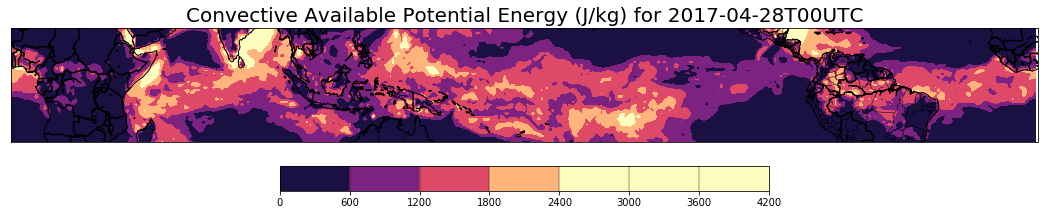

In [41]:
%pylab inline
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1 import make_axes_locatable

data = xr.open_dataset("http://nomads.ncep.noaa.gov:9090/dods/gfs_1p00/gfs20170428/gfs_1p00_00z")

#data prep
#grab coordinate values
time_1d = data.time
lat_1d = data.lat
lon_1d = data.lon
capesfc = data['capesfc'].sel(time=time_1d[0],method='nearest')
#make the lats and lons two dimensional like the data
lon_2d, lat_2d = np.meshgrid(lon_1d, lat_1d)

# llcrnrlon - lower left corner of longitude
# others follow same format
map_fig = plt.figure(figsize=(54, 3))
map_fig = Basemap(llcrnrlon=0.,llcrnrlat=-20.,urcrnrlon=360.,urcrnrlat=20.,
             resolution='l', projection='cyl')

#use contourf to fill the contours
CS=map_fig.contourf(lon_2d, lat_2d, capesfc, cmap='magma', vmin = 0, vmax = 2500)

map_fig.drawcoastlines()
map_fig.drawstates()
map_fig.drawcountries(linewidth=1.5)

plt.colorbar(CS, drawedges=True, orientation = 'horizontal')
plt.title('Convective Available Potential Energy (J/kg) for ' + str(time_1d.values[0])[0:13] + 'UTC', fontsize=20)
plt.show()

In [ ]:
box = data.sel(time='2017-04-30-00', lat=slice(-20, 20))
cape = box['capesfc']

time = box.time
lat_1d = box.lat
lon_1d = box.lon
lon_2d, lat_2d = np.meshgrid(lon_1d, lat_1d)

In [ ]:
figure = plt.figure(figsize=(20, 20))
ax = plt.subplot(111)
map_fig = Basemap(llcrnrlon=0.,llcrnrlat=-20.,urcrnrlon=360.,urcrnrlat=20.,
                  resolution='l', projection='cyl')
map_fig.drawcoastlines()
map_fig.drawstates()
map_fig.drawcountries(linewidth=1.5)
parallels = np.arange(-20, 20, 10)
map_fig.drawparallels(parallels, labels=[1,0,0,0], fontsize=10, alpha=0.8)
meridians = np.arange(0, 360, 30)
map_fig.drawmeridians(meridians, labels=[0,0,0,1], fontsize=10, alpha=0.8)
im = map_fig.contourf(lon_2d, lat_2d, cape, levels=np.arange(0, 2750, 250), cmap='magma', extend='both')

/projects/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3683: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/projects/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3719: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  xx = x[x.shape[0]/2,:]
/projects/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3752: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


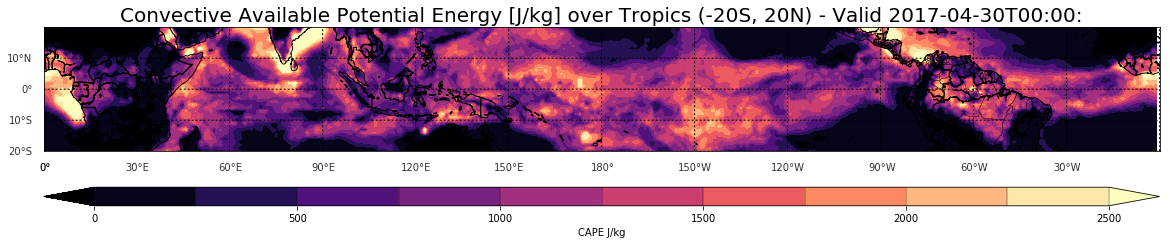

In [28]:
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="15%", pad=0.5)
cbar = plt.colorbar(im, cax, drawedges=True, orientation='horizontal')
cbar.set_label('CAPE J/kg')
title_fmt = 'Convective Available Potential Energy [J/kg] over Tropics (-20S, 20N) - Valid {time}'
ax.set_title(title_fmt.format(time=str(time.values)[:-12]), size=20)

---
## Problem 2

From the data, create a 3-panel time-height cross section over New York City.

1. In Panel 1, contourf u-wind and contour temperature.
1. In Panel 2, contourf relative humidity and contour vertical velocity.
1. In Panel 3, contourf geopotential height and plot wind barb profiles (pointing in the direction from north using the u an v winds, not the component in the page) as a function of height.  You may need to thin out the wind barbs (i.e., with subscripts like [::5,::5] if there are too many to read.

Ensure you use appropriate axis labels (with units), color bars (with what is plotted and units), and titles (with fields and times).  Also, make the contours readable, but not so many that the data is uninterpretable.

Populating the interactive namespace from numpy and matplotlib
<xarray.DataArray 'ugrdprs' (lat: 181, lon: 360)>
array([[-0.37, -0.33, -0.28, ..., -0.51, -0.47, -0.42],
       [-2.56, -2.51, -2.47, ..., -2.68, -2.64, -2.6 ],
       [-2.28, -2.18, -2.08, ..., -2.61, -2.49, -2.39],
       ..., 
       [ 3.74,  3.59,  3.45, ...,  4.21,  4.05,  3.89],
       [ 3.43,  3.45,  3.46, ...,  3.4 ,  3.41,  3.42],
       [ 2.41,  2.52,  2.63, ...,  2.07,  2.18,  2.29]])
Coordinates:
    time     datetime64[ns] 2017-03-15
    lev      float64 850.0
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 -85.0 -84.0 -83.0 ...
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
Attributes:
    long_name: ** (1000 975 950 925 900.. 7 5 3 2 1) u-component of wind [m/s] 


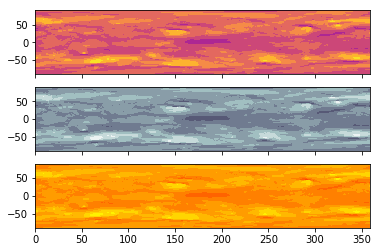

In [51]:
%pylab inline
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

data=xr.open_dataset("http://nomads.ncep.noaa.gov:9090/dods/gfs_1p00/gfs20170315/gfs_1p00_00z")

#data prep
#grab coordinate values
time_1d = data.time
lat_1d = data.lat
lon_1d = data.lon
uwind = data['ugrdprs'].sel(time=time_1d[0],lev=850.,method='nearest')
#make the lats and lons two dimensional like the data
lon_2d, lat_2d = np.meshgrid(lon_1d, lat_1d)
print(uwind)

fig, (pan1, pan2, pan3) = plt.subplots(3, sharex=True, sharey=True)
pan1.contourf(lon_2d, lat_2d, uwind, cmap='plasma')
pan2.contourf(lon_2d, lat_2d, uwind, cmap='bone')
pan3.contourf(lon_2d, lat_2d, uwind, cmap='autumn')


#### Referencing http://matplotlib.org/examples/pylab_examples/subplots_demo.html

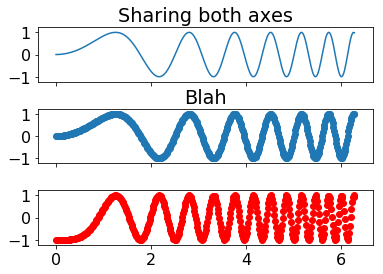

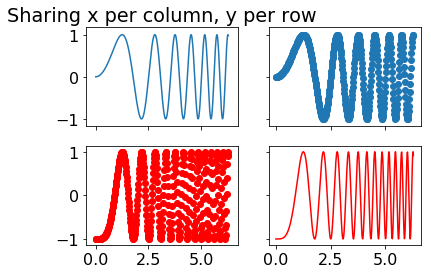

In [30]:
# Simple data to display in various forms
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

# Three subplots sharing both x/y axes
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing both axes')
ax2.scatter(x, y)
ax2.set_title('Blah')
ax3.scatter(x, 2 * y ** 2 - 1, color='r')
# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
f.subplots_adjust(hspace=0.5)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

# row and column sharing
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.plot(x, y)
ax1.set_title('Sharing x per column, y per row')
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')
ax4.plot(x, 2 * y ** 2 - 1, color='r')

plt.show()